# Length

In [1307]:
import os
import pandas
import numpy as np
import pandas as pd
import re
import ast
import json
from CS_feature_extractor import *
DATA_DIR = '../data'

# Experiment Config
DF_NAME = 'GSM8K'

NUM_OF_SAMPLES = 500
NUM_OF_COT = 40
MODEL = 'gpt-3.5-turbo-0125'
storage_dir = os.path.join(DATA_DIR, f'Evaluation_CoTs/Algo_Design_Data')
hard_file_path = os.path.join(storage_dir, f'{DF_NAME}_hard.json')
easy_file_path = os.path.join(storage_dir, f'{DF_NAME}_easy.json')

In [1457]:
def sigmoid(x):
    return 1 / (1 + np.exp(-(x-5)))

In [1458]:
with open(hard_file_path,'r') as f:
    data = json.load(f)
hard = pd.DataFrame(data)
hard['size_of_cot'] = [[i+1 for i in range(40)] for j in range(500)]
for row_idx in range(len(hard)):
    hard['SIM_COT_AGG'][row_idx][0] = 0.5
hard['SIM_COT_AGG'] = hard['SIM_COT_AGG'].apply(lambda lst: [x*sigmoid(idx) for idx,x in enumerate(lst)])
hard

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,size_of_cot
0,0,-9867630,"[0, 9867650, 19735200, -9867630, 1973528, 1973...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.8827160493827161, 0.9006211180124224, ...","[0.0033464254621424277, 0.015876716201105513, ...","[0.0, 0.8827160493827161, 0.9207052958483164, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,1,3431580,"[3431580, 3431580, 3431580, 3431580, 3431580, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 4, 4, 4, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...",Challenging Math,"[0.0, 0.8947368421052632, 0.6111111111111112, ...","[0.0033464254621424277, 0.016092924702924026, ...","[0.0, 0.8947368421052632, 0.6339137645107795, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,2,322886700,"[14, 14, 14, 107628900, 107628900, 14, 1076289...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, ...",Challenging Math,"[0.0, 0.9117647058823529, 1.0, 0.8676470588235...","[0.0033464254621424277, 0.016399191436024658, ...","[0.0, 0.9117647058823529, 0.9558823529411764, ...","[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, ...","[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, ...","[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,3,-6887448,"[6887423, 6887423, 6887398, 6887398, 167, 206,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 3, 3, 3, 3, 4, 5, 5, 3, 3, 5, 0, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 5, 0, 5, 2, 5, 5, 2, 9, 10, 5, 9, 2,...",Challenging Math,"[0.0, 0.874251497005988, 0.6787564766839378, 1...","[0.0033464254621424277, 0.01572447098482256, 0...","[0.0, 0.874251497005988, 0.707657808234442, 0....","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,4,21459061,"[21459067, 21459067, 16104295, 21459060, 16119...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6, 4, 1, 6, 5, 6, 5, 5, 4, 5, 1, 6, 3, 6, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.6701570680628273, 0.4605263157894737, ...","[0.0033464254621424277, 0.012053585733757694, ...","[0.0, 0.6701570680628273, 0.41422542204568025,...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,100,"[80, 40, 100, 100, 100, 100, 100, 100, 100, 10...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 2, 0, 0, 0, 0, 9, 2, 2, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.7612903225806451, 0.6611111111111111, ...","[0.0033464254621424277, 0.013692727584043895, ...","[0.0, 0.7612903225806451, 0.6762345679012345, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 1

In [1459]:
with open(easy_file_path,'r') as f:
    data = json.load(f)
easy = pd.DataFrame(data)
easy['size_of_cot'] = [[i+1 for i in range(40)] for j in range(500)]
for row_idx in range(len(easy)):
    easy['SIM_COT_AGG'][row_idx][0] = 0.5
easy['SIM_COT_AGG'] = easy['SIM_COT_AGG'].apply(lambda lst: [x*sigmoid(idx) for idx,x in enumerate(lst)])
easy

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,size_of_cot
0,0,18,"[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 5, 0, 0, ...",Math,"[0.0, 1.0, 0.7515527950310559, 0.6987951807228...","[0.0033464254621424277, 0.01786216713476679, 0...","[0.0, 1.0, 0.7515527950310559, 0.8462650602409...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,1,3,"[3, 3, 3, 5, 3, 5, 3, 3, 3, 45353, 3, 3, 3, 3,...","[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[4, 3, 5, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, ...",Math,"[0.0, 0.7633136094674556, 0.740506329113924, 0...","[0.0033464254621424277, 0.013729118846803615, ...","[0.0, 0.7633136094674556, 0.7008087201125175, ...","[0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, ...","[0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,2,70000,"[195000, 195000, 195000, 195000, 195000, 65000...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[4, 4, 4, 4, 4, 3, 8, 3, 8, 4, 3, 4, 4, 9, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 1.0, 0.8633540372670807, 0.8633540372670...","[0.0033464254621424277, 0.01798620996209156, 0...","[0.0, 1.0, 0.8633540372670807, 0.9544513457556...","[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, ...","[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,3,540,"[540, 540, 540, 540, 540, 540, 540, 540, 540, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 1.0, 1.0, 1.0, 0.9782608695652174, 1.0, ...","[0.0033464254621424277, 0.01798620996209156, 0...","[0.0, 1.0, 1.0, 1.0, 0.9782608695652174, 0.982...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,4,20,"[140, 140, 35, 3, 760, 21, 20, 10, 35, 140, 35...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 3, 3, 4, 3, 3, 4, 5, 3, 3, 3, 3, 3, 4, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.984375, 0.7913669064748201, 0.66279069...","[0.0033464254621424277, 0.01770517543143388, 0...","[0.0, 0.984375, 0.7921120246659814, 0.63736150...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,200,"[200, 200, 200, 200, 2400, 2400, 2400, 2400, 2...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...","[3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 6, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.944954128440367, 0.9166666666666666, 1...","[0.0033464254621424277, 0.017161154459243322, ...","[0.0, 0.944954128440367, 0.9256230529595015, 0...","[0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3,

# Early stopping and SC 

In [1499]:
from collections import Counter

def calculate_correctness(df):
    # Define a helper function to determine the majority and compare it with the correct answer
    def check_majority(answers, correct):
        if not answers:
            return 0
        # Count the occurrences of each answer and find the most common one
        most_common = Counter(answers).most_common(1)[0][0]
        # Compare the most common answer with the correct answer
        return 1 if most_common == str(correct) else 0

    # Apply the helper function across the DataFrame rows
    df['SC_correctness'] = df.apply(lambda row: check_majority(row['CoT answers'], row['correct answer']), axis=1)
    return df

hard = calculate_correctness(hard)

In [1500]:
hard.SC_correctness.value_counts()

SC_correctness
1    634
0    366
Name: count, dtype: int64

In [1501]:
easy = calculate_correctness(easy)
easy.SC_correctness.value_counts()

SC_correctness
1    402
0     98
Name: count, dtype: int64

In [1502]:
import pandas as pd

def evaluate_answers_with_window(df, window_size):
    # Helper function to evaluate answers with a sliding window
    def evaluate_window(answers, correct):
        # Track the number of steps (checks) taken
        steps = window_size-1
        
        # If the list is shorter than the window size, adjust the window size to the length of the list
        window_size_adjusted = min(window_size, len(answers))
        
        # Slide through the list with the adjusted window size
        for i in range(len(answers) - window_size_adjusted + 1):
            # Check the window content
            window = answers[i:i + window_size_adjusted]
            steps += 1
            
            # If all elements in the window are the same, evaluate correctness
            if window.count(window[0]) == window_size_adjusted:
                return 1 if window[0] == str(correct) else 0, steps
        
        # If no unanimous window is found, use the same value as SC_correctness and set steps to the length of the list
        majority = Counter(answers).most_common(1)[0][0]
        correctness = 1 if majority == str(correct) else 0
        return correctness, len(answers)

    # Apply the function to each row in the DataFrame
    result = df.apply(lambda row: evaluate_window(row['CoT answers'], row['correct answer']), axis=1)
    df['ES_correctness'] = result.apply(lambda x: x[0])
    df['ES_steps'] = result.apply(lambda x: x[1])

    return df

easy = evaluate_answers_with_window(easy,5)

In [1503]:
easy.ES_correctness.value_counts()

ES_correctness
1    401
0     99
Name: count, dtype: int64

In [1504]:
easy.ES_steps.mean()

13.15

In [1505]:
hard = evaluate_answers_with_window(hard,5)
hard.ES_correctness.value_counts()

ES_correctness
1    634
0    366
Name: count, dtype: int64

In [1506]:
hard.ES_steps.mean()

17.234

In [1507]:
feature_li = [
 'LEN',
 'QUA_IM',
 'DIF_IV',
 # 'DIF_SUB',
 # 'SIM_COT_BIGRAM',
 'SIM_COT_AGG',
 # 'SIM_COT_PW',
 # 'SIM_AC_BIGRAM',
 'SIM_AC_AGG',
 # 'SIM_AC_PW',
    'size_of_cot'

 
  ]

# Visualize

In [1514]:
import pandas as pd

def concatenate_columns(df,data_columns, outcome_column):
    # Initialize an empty dictionary to store the concatenated data
    concatenated_data = {}
    
    # Get the number of rows based on the length of the outcome column
    num_rows = len(df)
    
    # Iterate over each column
    for column in data_columns+[outcome_column]:
        # Initialize an empty list to store the concatenated values for the current column
        concatenated_values = []
        
        # Iterate over each row
        for i in range(num_rows):
            # Get the list of values for the current column and row
            
            values = df[column].iloc[i]
            
            # Concatenate the values into a single string
            concatenated_values += list(values)
            
        
        # Add the concatenated values to the dictionary with the column name as the key
        concatenated_data[column] = concatenated_values
        print(len(concatenated_values))
    # Add the outcome column to the concatenated data dictionary
    
    # Create a DataFrame from the concatenated data dictionary
    hard_final = pd.DataFrame(concatenated_data)
    
    return hard_final

hard_final = concatenate_columns(hard,feature_li,'Correctness')
easy_final = concatenate_columns(easy,feature_li,'Correctness')

40000
40000
40000
40000
40000
40000
40000
20000
20000
20000
20000
20000
20000
20000


In [1515]:
hard_final['cot_answer'] = np.repeat(hard['correct answer'].values,40)

In [1516]:
easy_final['cot_answer'] = np.repeat(easy['correct answer'].values,40)

In [1517]:
hard_final

,LEN,QUA_IM,DIF_IV,SIM_COT_AGG,SIM_AC_AGG,size_of_cot,Correctness,cot_answer
0,5,0,2,0.003346,0,1,0,-9867630
1,5,0,0,0.015877,0,2,0,-9867630
2,5,0,0,0.042510,0,3,0,-9867630
3,6,0,0,0.078749,0,4,1,-9867630
4,5,0,0,0.191756,0,5,0,-9867630
...,...,...,...,...,...,...,...,...
39995,6,0,0,0.672489,1,36,1,10
39996,7,0,0,0.709957,1,37,1,10
39997,6,0,0,0.683983,1,38,1,10
39998,6,0,0,0.679654,1,39,1,10


In [1518]:
hard

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,...,SIM_AC_AGG,SIM_AC_PW,size_of_cot,SC_correctness,ES_correctness,ES_steps,confidence_score,CS_Answer,CS_correctness,CS_steps
0,0,-9867630,"[0, 9867650, 19735200, -9867630, 1973528, 1973...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.8827160493827161, 0.9006211180124224, ...","[0.0033464254621424277, 0.015876716201105513, ...",...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0,0,40,"[0.11307452387299996, 0.14104794660437656, 0.1...",9867650,0,5
1,1,3431580,"[3431580, 3431580, 3431580, 3431580, 3431580, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 4, 4, 4, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...",Challenging Math,"[0.0, 0.8947368421052632, 0.6111111111111112, ...","[0.0033464254621424277, 0.016092924702924026, ...",...,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,1,5,"[0.10863044520936413, 0.5905465741370292, 0.58...",3431580,1,8
2,2,322886700,"[14, 14, 14, 107628900, 107628900, 14, 1076289...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, ...",Challenging Math,"[0.0, 0.9117647058823529, 1.0, 0.8676470588235...","[0.0033464254621424277, 0.016399191436024658, ...",...,"[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, ...","[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0,0,28,"[0.10020088862953863, 0.5686488883286643, 0.57...",107628900,0,21
3,3,-6887448,"[6887423, 6887423, 6887398, 6887398, 167, 206,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 3, 3, 3, 3, 4, 5, 5, 3, 3, 5, 0, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 5, 0, 5, 2, 5, 5, 2, 9, 10, 5, 9, 2,...",Challenging Math,"[0.0, 0.874251497005988, 0.6787564766839378, 1...","[0.0033464254621424277, 0.01572447098482256, 0...",...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0,0,40,"[0.10863044520936413, 0.5795113771194915, 0.13...",167,0,5
4,4,21459061,"[21459067, 21459067, 16104295, 21459060, 16119...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6, 4, 1, 6, 5, 6, 5, 5, 4, 5, 1, 6, 3, 6, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.6701570680628273, 0.4605263157894737, ...","[0.0033464254621424277, 0.012053585733757694, ...",...,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0,0,40,"[0.1470634612389317, 0.5895814972799521, 0.119...",21459067,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,200,"[200, 200, 200, 200, 2400, 2400, 2400, 2400, 2...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...","[3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 6, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.944954128440367, 0.9166666666666666, 1...","[0.0033464254621424277, 0.017161154459243322, ...",...,"[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,0,9,"[0.27883547072899

In [1519]:
from collections import Counter
print('--------------EASY--------------')
for col in easy_final.columns:
    if not col.startswith('SIM_COT_'):
        print(col, ':', Counter(easy_final[col]))
print('--------------HARD--------------')
for col in hard_final.columns:
    if not col.startswith('SIM_COT_'):
        print(col, ':', Counter(hard_final[col]))

--------------EASY--------------
LEN : Counter({3: 5224, 4: 4332, 5: 2859, 2: 2296, 6: 2293, 7: 1320, 8: 639, 9: 367, 0: 188, 10: 180, 1: 114, 11: 75, 12: 47, 13: 19, 15: 19, 14: 14, 16: 7, 21: 2, 20: 1, 17: 1, 19: 1, 100: 1, 23: 1})
QUA_IM : Counter({0: 19961, 1: 39})
DIF_IV : Counter({0: 18375, 2: 1127, 5: 279, 10: 124, 9: 83, 1: 7, 11: 3, 3: 1, 6: 1})
SIM_AC_AGG : Counter({1: 15238, 0: 4762})
size_of_cot : Counter({1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500, 10: 500, 11: 500, 12: 500, 13: 500, 14: 500, 15: 500, 16: 500, 17: 500, 18: 500, 19: 500, 20: 500, 21: 500, 22: 500, 23: 500, 24: 500, 25: 500, 26: 500, 27: 500, 28: 500, 29: 500, 30: 500, 31: 500, 32: 500, 33: 500, 34: 500, 35: 500, 36: 500, 37: 500, 38: 500, 39: 500, 40: 500})
Correctness : Counter({1: 14452, 0: 5548})
cot_answer : Counter({6: 720, 20: 640, 5: 600, 4: 600, 15: 520, 10: 480, 3: 440, 8: 440, 2: 440, 16: 400, 50: 360, 18: 320, 9: 320, 40: 320, 21: 320, 45: 280, 25: 280, 30: 280, 12: 28

# Hard DF

Optimization terminated successfully.
         Current function value: 0.514517
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Correctness   No. Observations:                32000
Model:                          Logit   Df Residuals:                    31993
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Apr 2024   Pseudo R-squ.:                  0.2571
Time:                        11:15:54   Log-Likelihood:                -16465.
converged:                       True   LL-Null:                       -22162.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.6128      0.049    -32.817      0.000      -1.709      -1.516
LEN             0.0210    

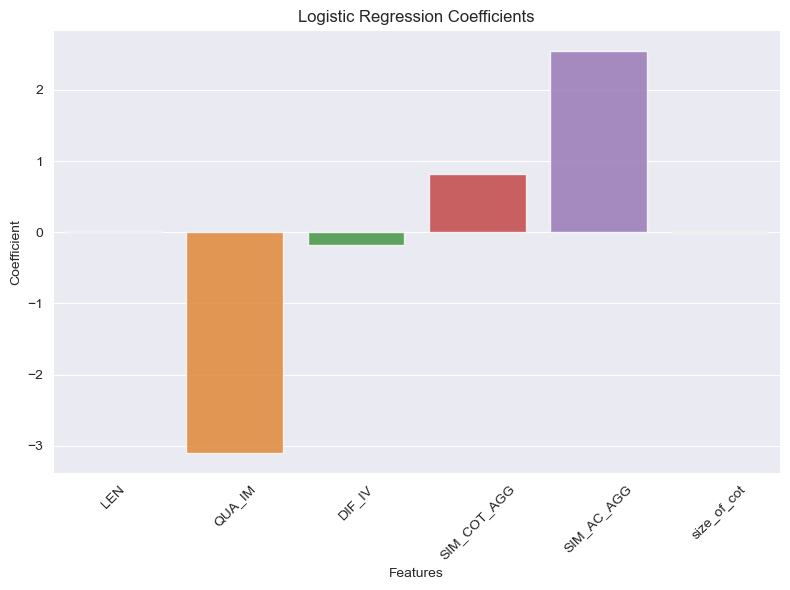

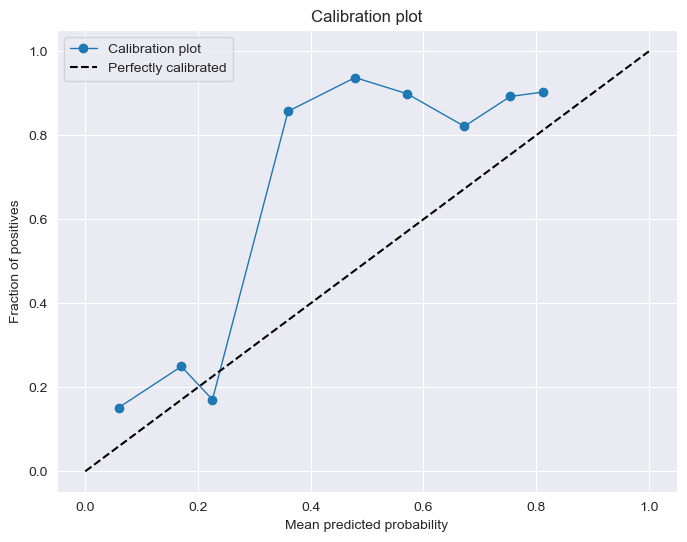

In [1520]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss, precision_recall_curve, auc,roc_curve, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Calculate the split index
split_idx = int(len(hard_final) * 0.8)  # 80% of the length of the dataset

# Split the data into training and test sets
X_train_hard = hard_final[feature_li].iloc[:split_idx]
y_train_hard = hard_final['Correctness'].iloc[:split_idx]
X_test_hard = hard_final[feature_li].iloc[split_idx:]
y_test_hard = hard_final['Correctness'].iloc[split_idx:]

# Add a constant term to the features for the intercept for training and testing set
X_train_hard = sm.add_constant(X_train_hard)
X_test_hard = sm.add_constant(X_test_hard)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y_train_hard, X_train_hard)
result = model.fit()

# Print the model summary to see the coefficients and their significance
print(result.summary())

# Split the data into training and test sets
X_train_hard = hard_final[feature_li].iloc[:split_idx]
y_train_hard  = hard_final['Correctness'].iloc[:split_idx]
X_test_hard  = hard_final[feature_li].iloc[split_idx:]
y_test_hard  = hard_final['Correctness'].iloc[split_idx:]

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_hard , y_train_hard )

# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the test data (predicting probabilities)
y_pred_proba = model.predict_proba(X_test_hard)[:, 1]  # Get probabilities for the positive class

# Calculate the AUROC
auroc = roc_auc_score(y_test_hard, y_pred_proba)
print(f"The AUROC score is: {auroc}")

# Visualize the coefficients and their significance using a bar plot
coef_df = pd.DataFrame({'Coefficient': model.coef_[0]}, index=X_train_hard.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coef_df.index, y=coef_df['Coefficient'], alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test_hard, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

In [1521]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss, precision_recall_curve, auc,roc_curve, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Calculate the split index
split_idx = int(len(hard_final) * 0.8)  # 80% of the length of the dataset


# Split the data into training and test sets
X_train_hard = hard_final[feature_li].iloc[:split_idx]
y_train_hard  = hard_final['Correctness'].iloc[:split_idx]
X_test_hard  = hard_final[feature_li].iloc[split_idx:]
y_test_hard  = hard_final['Correctness'].iloc[split_idx:]
model = MLPClassifier(solver='adam', alpha=1e-3,
               hidden_layer_sizes=(8, 2), random_state=1,max_iter=500)

model.fit(X_train_hard , y_train_hard )

# Print the model coefficients and intercept

# Make predictions on the test data (predicting probabilities)
y_pred_proba = model.predict_proba(X_test_hard)[:, 1]  # Get probabilities for the positive class

# Calculate the AUROC
auroc = roc_auc_score(y_test_hard, y_pred_proba)
print(f"The AUROC score is: {auroc}")
hard_nn = model

The AUROC score is: 0.8526934993122803


In [1522]:
X_train_hard

,LEN,QUA_IM,DIF_IV,SIM_COT_AGG,SIM_AC_AGG,size_of_cot
0,5,0,2,0.003346,0,1
1,5,0,0,0.015877,0,2
2,5,0,0,0.042510,0,3
3,6,0,0,0.078749,0,4
4,5,0,0,0.191756,0,5
...,...,...,...,...,...,...
31995,6,0,0,0.688596,1,36
31996,6,0,0,0.679825,1,37
31997,6,0,0,0.688596,1,38
31998,6,0,0,0.714912,1,39


The AUROC score is: 0.8157509839452682
The Brier score is: 0.15734607721581495
Log Loss is: 0.7405789568749317


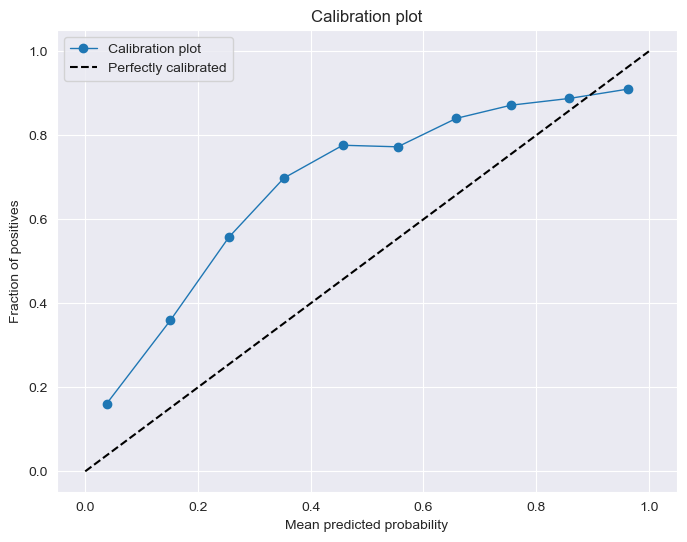

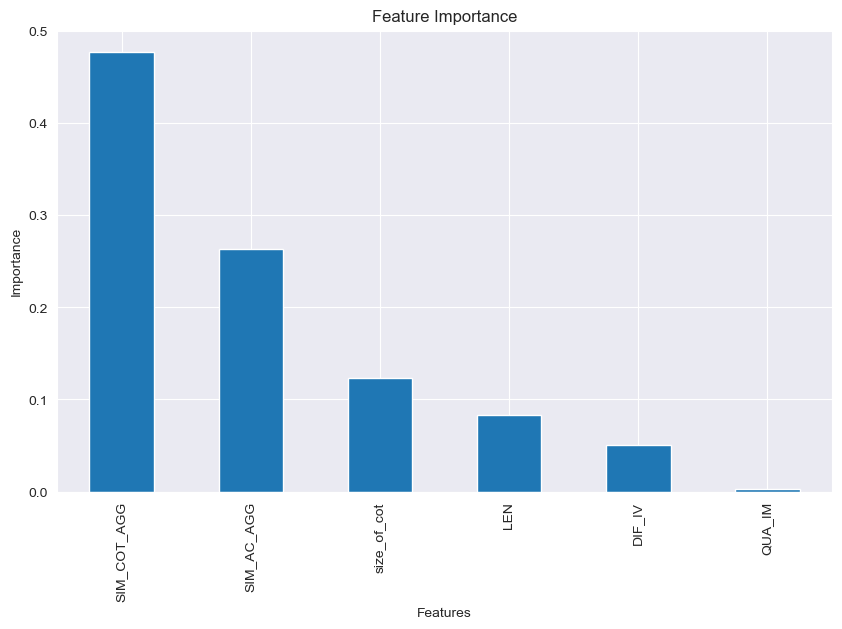

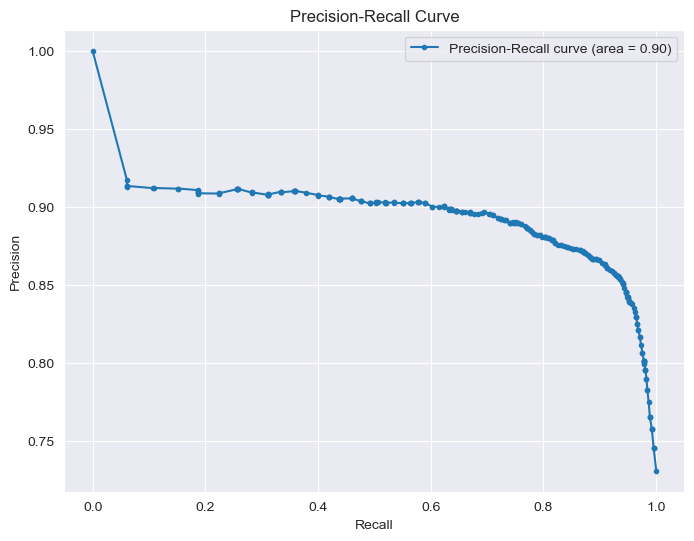

In [1523]:
# Initialize and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_hard, y_train_hard)

# Make predictions on the test data (predicting probabilities for the class of interest)
y_pred_proba = model.predict_proba(X_test_hard)[:, 1]  # Assuming '1' is the positive class

# Metrics
auroc = roc_auc_score(y_test_hard, y_pred_proba)
brier = brier_score_loss(y_test_hard, y_pred_proba)
logloss = log_loss(y_test_hard, y_pred_proba)
print(f"The AUROC score is: {auroc}")
print(f"The Brier score is: {brier}")
print(f"Log Loss is: {logloss}")

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test_hard, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X_train_hard.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test_hard, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
rf_hard_model = model

W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore

AUROC Score: 0.8166159030960286
Best Threshold: 0.33923703448211406
Confusion Matrix:
[[1478  677]
 [ 416 5429]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      2155
           1       0.89      0.93      0.91      5845

    accuracy                           0.86      8000
   macro avg       0.83      0.81      0.82      8000
weighted avg       0.86      0.86      0.86      8000


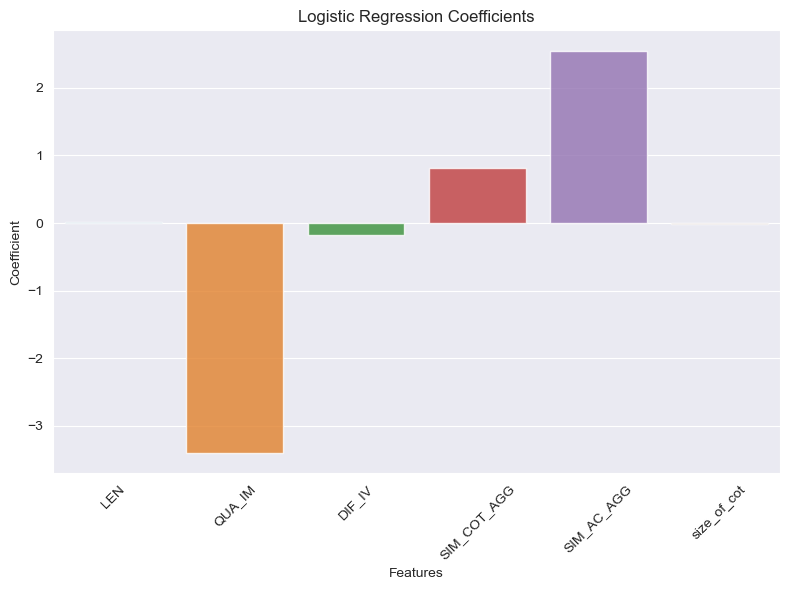

In [1524]:
# Setting up the logistic regression model
log_reg = LogisticRegression()

# Using GridSearchCV to optimize hyperparameters
param_grid = {
    'C': np.logspace(-4, 4, 10),  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Different solvers
    'penalty': ['l1', 'l2', 'none'],  # Regularization types
}

clf = GridSearchCV(log_reg, param_grid, cv=5, scoring='neg_log_loss', refit=True)
clf.fit(X_train_hard, y_train_hard)

# Best model
model = clf.best_estimator_

# Predict probabilities
y_probs = model.predict_proba(X_test_hard)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_hard, y_probs)
auc_score = roc_auc_score(y_test_hard, y_probs)
print(f'AUROC Score: {auc_score}')

# Finding the best cutoff value
f1_scores = [f1_score(y_test_hard, y_probs > thresh) for thresh in thresholds]
lr_hard_best_thresh = thresholds[np.argmax(f1_scores)]
print(f'Best Threshold: {lr_hard_best_thresh}')

# Predict using the best threshold
y_pred = (y_probs >= lr_hard_best_thresh).astype(int)

# Evaluate the model
cm = confusion_matrix(y_test_hard, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test_hard, y_pred))

# Plotting the coefficients
coefficients = pd.Series(model.coef_[0], index=feature_li)
plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
lr_hard_model = model

# Easy

Optimization terminated successfully.
         Current function value: 0.404258
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            Correctness   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15993
Method:                           MLE   Df Model:                            6
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:                  0.3128
Time:                        16:38:36   Log-Likelihood:                -6468.1
converged:                       True   LL-Null:                       -9411.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7870      0.079    -10.010      0.000      -0.941      -0.633
LEN            -0.0473    

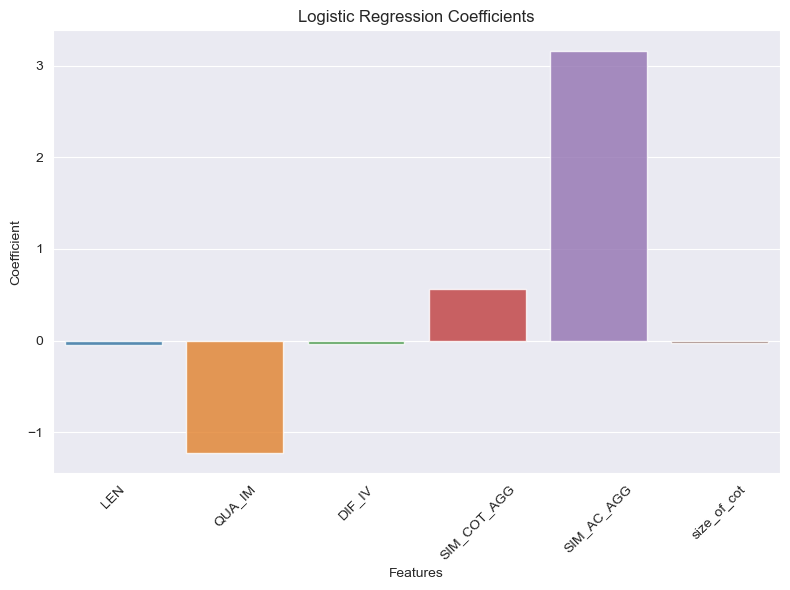

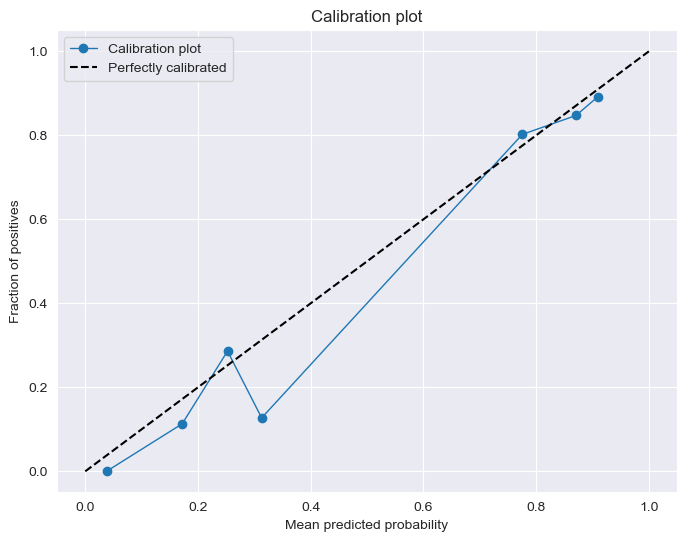

In [1480]:

# Calculate the split index
split_idx = int(len(easy_final) * 0.8)  # 80% of the length of the dataset

# Split the data into training and test sets
X_train_easy = easy_final[feature_li].iloc[:split_idx]
y_train_easy = easy_final['Correctness'].iloc[:split_idx]
X_test_easy = easy_final[feature_li].iloc[split_idx:]
y_test_easy = easy_final['Correctness'].iloc[split_idx:]

# Add a constant term to the features for the intercept for training and testing set
X_train_easy = sm.add_constant(X_train_easy)
X_test_easy = sm.add_constant(X_test_easy)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y_train_easy, X_train_easy)
result = model.fit()

# Print the model summary to see the coefficients and their significance
print(result.summary())

# Split the data into training and test sets
X_train_easy = easy_final[feature_li].iloc[:split_idx]
y_train_easy = easy_final['Correctness'].iloc[:split_idx]
X_test_easy = easy_final[feature_li].iloc[split_idx:]
y_test_easy = easy_final['Correctness'].iloc[split_idx:]

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_easy, y_train_easy)

# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the test data (predicting probabilities)
y_pred_proba = model.predict_proba(X_test_easy)[:, 1]  # Get probabilities for the positive class

# Calculate the AUROC
auroc = roc_auc_score(y_test_easy, y_pred_proba)
print(f"The AUROC score is: {auroc}")

# Visualize the coefficients and their significance using a bar plot
coef_df = pd.DataFrame({'Coefficient': model.coef_[0]}, index=X_train_easy.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coef_df.index, y=coef_df['Coefficient'], alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test_easy, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

The AUROC score is: 0.8078634246335479
The Brier score is: 0.142481606353664
Log Loss is: 1.3000687049578947


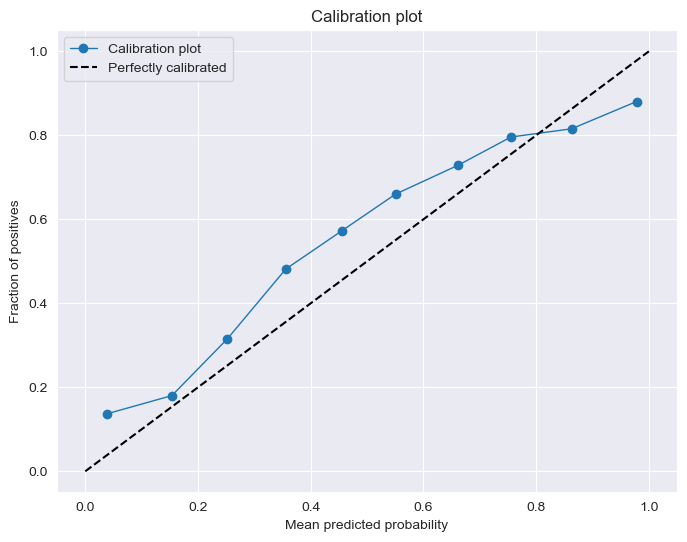

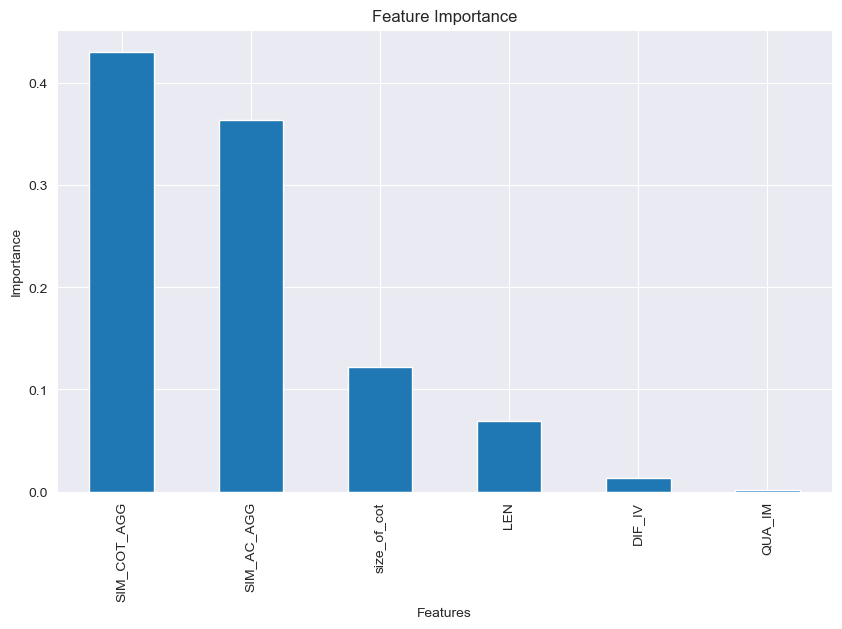

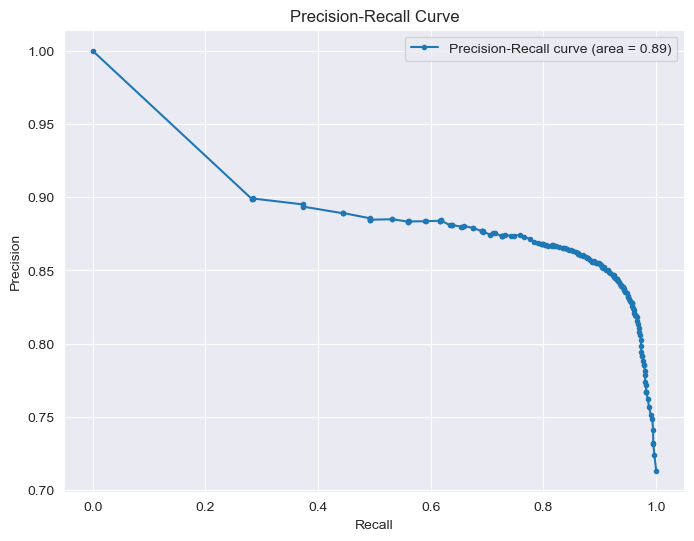

In [1481]:
# Initialize and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_easy, y_train_easy)

# Make predictions on the test data (predicting probabilities for the class of interest)
y_pred_proba = model.predict_proba(X_test_easy)[:, 1]  # Assuming '1' is the positive class

# Metrics
auroc = roc_auc_score(y_test_easy, y_pred_proba)
brier = brier_score_loss(y_test_easy, y_pred_proba)
logloss = log_loss(y_test_easy, y_pred_proba)
print(f"The AUROC score is: {auroc}")
print(f"The Brier score is: {brier}")
print(f"Log Loss is: {logloss}")

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test_easy, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X_train_easy.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test_easy, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
rf_easy_model = model

W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore

AUROC Score: 0.8091997563860798
Best Threshold: 0.7391130777001875
Confusion Matrix:
[[ 719  428]
 [ 220 2633]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.63      0.69      1147
           1       0.86      0.92      0.89      2853

    accuracy                           0.84      4000
   macro avg       0.81      0.77      0.79      4000
weighted avg       0.83      0.84      0.83      4000


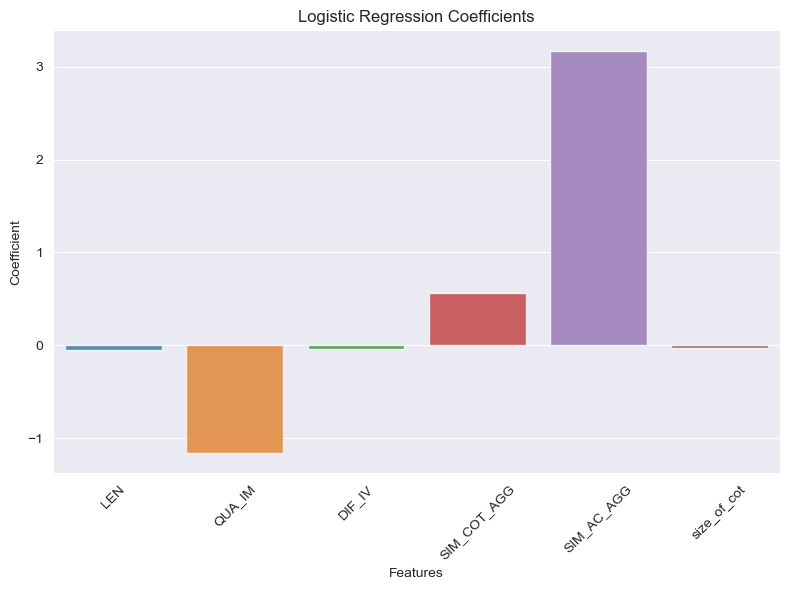

In [1482]:
# Setting up the logistic regression model
log_reg = LogisticRegression()

# Using GridSearchCV to optimize hyperparameters
param_grid = {
    'C': np.logspace(-4, 4, 10),  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Different solvers
    'penalty': ['l1', 'l2', 'none'],  # Regularization types
}

clf = GridSearchCV(log_reg, param_grid, cv=5, scoring='neg_log_loss', refit=True)
clf.fit(X_train_easy, y_train_easy)

# Best model
model = clf.best_estimator_

# Predict probabilities
y_probs = model.predict_proba(X_test_easy)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_easy, y_probs)
auc_score = roc_auc_score(y_test_easy, y_probs)
print(f'AUROC Score: {auc_score}')

# Finding the best cutoff value
f1_scores = [f1_score(y_test_easy, y_probs > thresh) for thresh in thresholds]
lr_easy_best_thresh = thresholds[np.argmax(f1_scores)]
print(f'Best Threshold: {lr_easy_best_thresh}')

# Predict using the best threshold
y_pred = (y_probs >= lr_easy_best_thresh).astype(int)

# Evaluate the model
cm = confusion_matrix(y_test_easy, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test_easy, y_pred))

# Plotting the coefficients
coefficients = pd.Series(model.coef_[0], index=X_train_easy.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
lr_easy_model = model

# CS based performance

In [1530]:
df = easy
df_concate = easy_final
cls_model = hard_nn
threshold = 0.5
warm_up_steps = 5

In [1535]:
df_concate['confidence_score']= cls_model.predict_proba(df_concate[feature_li])[:,1]
lists = [df_concate['confidence_score'].iloc[i:i+40].tolist() for i in range(0, len(df_concate), 40)]
df['confidence_score'] = lists
df

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,...,SIM_AC_AGG,SIM_AC_PW,size_of_cot,SC_correctness,ES_correctness,ES_steps,confidence_score,CS_Answer,CS_correctness,CS_steps
0,0,18,"[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 5, 0, 0, ...",Math,"[0.0, 1.0, 0.7515527950310559, 0.6987951807228...","[0.0033464254621424277, 0.01786216713476679, 0...",...,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,1,5,"[0.515464889793368, 0.7558374903420529, 0.7293...",18,1,8
1,1,3,"[3, 3, 3, 5, 3, 5, 3, 3, 3, 45353, 3, 3, 3, 3,...","[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[4, 3, 5, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, ...",Math,"[0.0, 0.7633136094674556, 0.740506329113924, 0...","[0.0033464254621424277, 0.013729118846803615, ...",...,"[0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,1,15,"[0.515464889793368, 0.7406090824231338, 0.7422...",5,0,9
2,2,70000,"[195000, 195000, 195000, 195000, 195000, 65000...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[4, 4, 4, 4, 4, 3, 8, 3, 8, 4, 3, 4, 4, 9, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 1.0, 0.8633540372670807, 0.8633540372670...","[0.0033464254621424277, 0.01798620996209156, 0...",...,"[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, ...","[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0,0,5,"[0.515464889793368, 0.7558873358118736, 0.7317...",195000,0,5
3,3,540,"[540, 540, 540, 540, 540, 540, 540, 540, 540, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 1.0, 1.0, 1.0, 0.9782608695652174, 1.0, ...","[0.0033464254621424277, 0.01798620996209156, 0...",...,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,1,5,"[0.48516364536298445, 0.7423859811199952, 0.72...",540,1,8
4,4,20,"[140, 140, 35, 3, 760, 21, 20, 10, 35, 140, 35...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 3, 3, 4, 3, 3, 4, 5, 3, 3, 3, 3, 3, 4, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.984375, 0.7913669064748201, 0.66279069...","[0.0033464254621424277, 0.01770517543143388, 0...",...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0,0,40,"[0.48516364536298445, 0.7422689234181811, 0.19...",760,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,200,"[200, 200, 200, 200, 2400, 2400, 2400, 2400, 2...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...","[3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 6, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.944954128440367, 0.9166666666666666, 1...","[0.0033464254621424277, 0.017161154459243322, ...",...,"[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,0,9,"[0.48516364536298445, 0.742042226841765, 0.703...",2400,0,5
496,496,38,"[38, 26, 10, 38, 38, 38, 38, 38, 38, 38, 10, 3...","[1

In [1536]:
def normalize_cs(cs_li, threshold):
    cs_arr = np.array(cs_li)
    normalized_cs = [(cs-threshold)/(1-threshold) if cs > threshold else (cs-threshold)/(threshold) for cs in cs_arr]
    return np.array(normalized_cs)

In [1537]:
CS_Answer = []
CS_correctness = []
CS_steps = []
for row_idx in range(len(df)): 
    test_row = df.iloc[row_idx]
    individual_cs = normalize_cs(test_row['confidence_score'],threshold)
    # individual_cs = test_row['confidence_score'][warm_up_steps:] - threshold
    cumulative_difference = (individual_cs[warm_up_steps:]).cumsum()
    stop_idx = np.argmax(cumulative_difference > 2)
    num_of_steps = warm_up_steps+stop_idx
    answers = test_row['CoT answers'][:num_of_steps]
    scores = individual_cs[:num_of_steps]
    weighted_votes = Counter()
    for answer, score in zip(answers, scores):
        weighted_votes[answer] += score
    # Find the answer with the highest total score
    result = max(weighted_votes, key=weighted_votes.get)
    CS_Answer.append(result)
    CS_correctness.append(1 if result == str(test_row['correct answer']) else 0)
    CS_steps.append(num_of_steps)
df['CS_Answer'] = CS_Answer
df['CS_correctness'] = CS_correctness
df['CS_steps'] = CS_steps
df

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,...,SIM_AC_AGG,SIM_AC_PW,size_of_cot,SC_correctness,ES_correctness,ES_steps,confidence_score,CS_Answer,CS_correctness,CS_steps
0,0,18,"[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 5, 0, 0, ...",Math,"[0.0, 1.0, 0.7515527950310559, 0.6987951807228...","[0.0033464254621424277, 0.01786216713476679, 0...",...,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,1,5,"[0.515464889793368, 0.7558374903420529, 0.7293...",18,1,8
1,1,3,"[3, 3, 3, 5, 3, 5, 3, 3, 3, 45353, 3, 3, 3, 3,...","[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[4, 3, 5, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, ...",Math,"[0.0, 0.7633136094674556, 0.740506329113924, 0...","[0.0033464254621424277, 0.013729118846803615, ...",...,"[0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,1,15,"[0.515464889793368, 0.7406090824231338, 0.7422...",3,1,13
2,2,70000,"[195000, 195000, 195000, 195000, 195000, 65000...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[4, 4, 4, 4, 4, 3, 8, 3, 8, 4, 3, 4, 4, 9, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 1.0, 0.8633540372670807, 0.8633540372670...","[0.0033464254621424277, 0.01798620996209156, 0...",...,"[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, ...","[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0,0,5,"[0.515464889793368, 0.7558873358118736, 0.7317...",195000,0,5
3,3,540,"[540, 540, 540, 540, 540, 540, 540, 540, 540, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 1.0, 1.0, 1.0, 0.9782608695652174, 1.0, ...","[0.0033464254621424277, 0.01798620996209156, 0...",...,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,1,5,"[0.48516364536298445, 0.7423859811199952, 0.72...",540,1,8
4,4,20,"[140, 140, 35, 3, 760, 21, 20, 10, 35, 140, 35...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 3, 3, 4, 3, 3, 4, 5, 3, 3, 3, 3, 3, 4, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.984375, 0.7913669064748201, 0.66279069...","[0.0033464254621424277, 0.01770517543143388, 0...",...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0,0,40,"[0.48516364536298445, 0.7422689234181811, 0.19...",140,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,200,"[200, 200, 200, 200, 2400, 2400, 2400, 2400, 2...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...","[3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 6, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.944954128440367, 0.9166666666666666, 1...","[0.0033464254621424277, 0.017161154459243322, ...",...,"[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,0,9,"[0.48516364536298445, 0.742042226841765, 0.703...",200,1,5
496,496,38,"[38, 26, 10, 38, 38, 38, 38, 38, 38, 38, 10, 3...","[1

In [1538]:
print(df.ES_steps.mean(),df.CS_steps.mean())
print()
print(df.ES_correctness.value_counts(),df.CS_correctness.value_counts())
print()
print(df.ES_correctness.sum()/len(df),df.CS_correctness.sum()/len(df))

13.15 8.726

ES_correctness
1    401
0     99
Name: count, dtype: int64 CS_correctness
1    383
0    117
Name: count, dtype: int64

0.802 0.766


In [1420]:

df_t07 = pd.read_json('../data/T0.7.jsonl', lines=True)

In [1413]:
df_t07['generated_answer'].iloc[0][3]

"A: Janet's ducks lay 16 eggs per day. She eats 3 and uses 4 for muffins every day. So she has 16 - 3 - 4 = 9 eggs left to sell. She can sell the 9 eggs for 9 x 2 = $18 per day. The answer is $18."

In [1414]:
import re
ANS_RE = re.compile(r"#### (\-?[0-9\.\,]+)")
INVALID_ANS = "[invalid]"


def extract_answer(completion):
    match = ANS_RE.search(completion)
    if match:
        match_str = match.group(1).strip()
        match_str = match_str.replace(",", "")
        return match_str
    else:
        return INVALID_ANS
extract_answer(df_t07.iloc[0]['answer'])

'18'

In [1343]:
tem_1 = df_t07['generated_answer'].iloc[0][3]
number_list = re.findall(r"\d+\.?\d*", tem_1)
try:
    predict1 = number_list[-1].strip('.')
except:
    predict1 = -1000
predict1

'18'

In [937]:
number_list

['16', '3', '4', '16', '3', '4', '9', '9', '9', '2', '18', '18.']